In [1]:
%%HTML
<!-- Mejorar visualización en proyector -->
<style>
.rendered_html {font-size: 1.2em; line-height: 150%;}
div.prompt {min-width: 0ex; }
.container {width:95% !important;}
</style>

<h1 style="text-align:center">Clase: Qué le ocurre a la señal cuando se discretiza</h1>
<h3 style="text-align:center">ACUS099: Procesamiento digital de señales</h3>
<p style="text-align:center">Dr. Víctor Poblete <br>
<a href="mailto:vpoblete@uach.cl">vpoblete@uach.cl</a><br>
<a href="https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales">https://github.com/vpobleteacustica/ACUS099-Procesamiento-digital-de-senales</a><br> 
<p style="text-align:center">Diego Espejo Alquinta - Ayudante <br>
<a href="mailto:diego.espejo@alumnos.uach.cl">diego.espejo@alumnos.uach.cl </a><br>
<a href="http://www.acusticauach.cl">www.acusticauach.cl</a><br> 

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="nyquist.png" width="800" height="480" alt="Tiny"></a>
    <strong>Figure 1. Efectos en el dominio de la frecuencia debido al proceso de muestreo.</strong>

### Resumiremos qué ocurre cuando una señal que está en el dominio de tiempo continuo, se convierte a una señal en el tiempo discreto.
> + Supongamos que tenemos una señal de voz en el dominio de tiempo continuo.
> + La señal de voz lleva un mensaje que está contenido en la pronunciación.
> + La señal está entre $0$ y $0.44$ segundos.
> + Esta señal la llamaremos $\large s(t)$.
> + A esta señal $\large s(t)$ le vamos a aplicar la transformada de Fourier: $\large\mathscr{F}\left\lbrace \large s(t) \right\rbrace=\large S(f)$ y vamos a dibujar su **espectro**.
> + Para el espectro, vamos a usar $f$ para la variable frecuencia en lugar de $\omega$, para que quede más sencillo, comunmete expresamos el espectro en Hz.
> + Dado que la señal es real, la transformada $S(f)=S(-f)$, es **simétrica**.
> + Esto es, lo que ocurre en la parte derecha del espectro, se repite en la parte izquierda.
> + El espectro muestra que la señal $\large s(t)$ tiene una frecuencia máxima de $\large 4k$ (Hz)

In [2]:
from scipy.fftpack import fft, fftshift, ifft
from scipy.fftpack import fftfreq
import scipy.io.wavfile as wavfile
import scipy
from scipy import signal
import librosa
import numpy as np
import matplotlib.pyplot as plt
import IPython.display as ipd
from matplotlib.ticker import ScalarFormatter
from matplotlib.ticker import EngFormatter
%matplotlib inline


In [3]:
filename  = 'mipropiavoz.wav'
s, rate   = librosa.load(filename, sr=8000) # Downsample 44.1kHz to 8kHz

N              = s.shape[0]
secs           = N/float(rate)  
Ts             = 1.0/rate
time_vector    = np.arange(0, secs, Ts)
S              = np.abs(fft(s))
S_side         = S[range(N//2)]
freqs          = fftfreq(s.size, time_vector[1]-time_vector[0])
fft_freqs      = np.array(freqs)
freqs_side     = freqs[range(N//2)]
fft_freqs_side = np.array(freqs_side)

In [ ]:
ipd.Audio(s, rate = rate)

In [ ]:
print(secs)

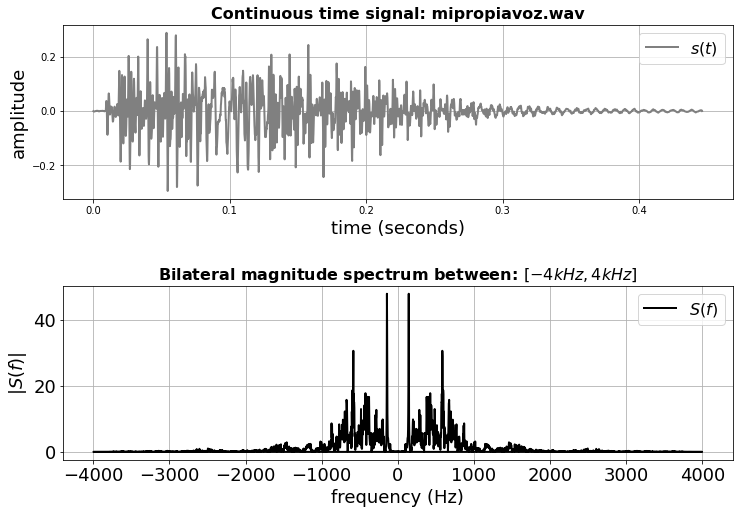

In [4]:
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8)) 
fig.subplots_adjust(hspace=.5)

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)

ax1.plot(time_vector, s, 'grey', label = '$s(t)$', linewidth=2)
ax1.set_xlabel('time (seconds)', fontsize=18)
ax1.set_ylabel('amplitude', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
plt.rc('legend',**{'fontsize':16})
ax1.legend()
ax1.set_title('Continuous time signal: ' + str(filename), fontweight="bold", size=16)
ax1.grid()

ax2.plot(freqs, S, 'k', label = '$S(f)$', linewidth=2)
ax2.set_xlabel('frequency (Hz)', fontsize=18)
ax2.set_ylabel('$|S(f)|$', fontsize=18)
ax2.legend()
ax2.set_title('Bilateral magnitude spectrum between: $[-4kHz, 4kHz]$' , fontweight="bold", size=16)
ax2.grid()

### Ahora, vamos a discretizar ahora la señal, por ejemplo, suponemos que la pasamos por un convertidor análogo digital:
> + La notación cambia: en lugar de tener la señal $\large s(t)$, ahora vamos a tener la señal $\large s[n]$.
> + Hemos tomado muestras de esa señal.
> + ¿Cómo obtenemos el nuevo espectro de esa señal discreta $\large s[n]$?
> + Recordemos que por el Teorema del Muestreo de Nyquist, la frecuencia mínima con la que tenemos que muestrear una señal es el doble de la máxima frecuencia que tiene esa señal.
> + La frecuencia **mínima** de muestreo tiene que ser $\large 8k$ (Hz).
> + Esto quiere decir que para el proceso de muestreo en esa ventana de tiempo de $\large 0$ a $\large 0.4465$ segundos, vamos a tener un total de 8000 muestras por segundo multiplicado por $\large 0.4465$ tendríamos: $\large 3572$ muestras en ese intervalo de tiempo.
> + ¿Matemáticamente, cómo se obtiene la señal discreta $\large s[n]$?
> + Multiplicamos la señal del dominio de tiempo continuo $\large s(t)$ por un tren de impulsos (un tren de deltas), en tiempo continuo de duración infinita (muchos impulsos deltas!).
> + Le vamos a llamar $\large s_2(t)$ al tren de impulsos que va a multiplicar.
> + La separación entre los impulsos la llamaremos $\large \Delta t$.

In [ ]:
print(rate*secs)

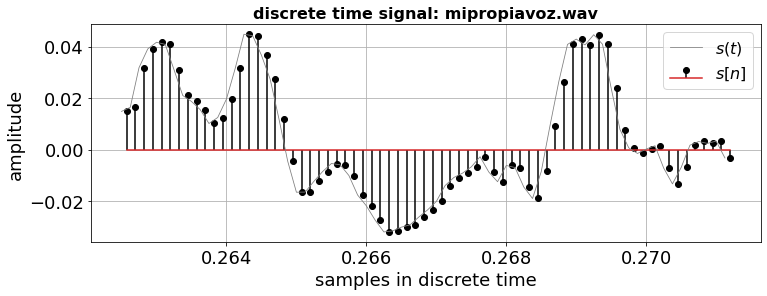

In [5]:
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 4)) 
fig.subplots_adjust(hspace=.5)

n   = np.linspace(0, secs, N)
on  = 2100
off = 2170

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
ax1.stem(n[on:off],s[on:off], linefmt='k', markerfmt='ko', label='$s[n]$')
ax1.plot(time_vector[on:off], s[on:off], 'grey', label = '$s(t)$', linewidth=0.8)
ax1.set_xlabel('samples in discrete time', fontsize=18)
ax1.set_ylabel('amplitude', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
ax1.set_title('discrete time signal: ' + str(filename), fontweight="bold", size=16)
ax1.legend()
ax1.grid()


In [6]:
ns = range(0, N, 1)
y = []
for i in range(len(ns)):
    temp = (1 if ns[i]>=0 else 0)
    y.append(temp)

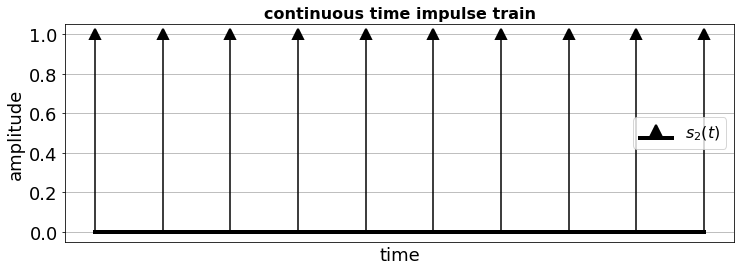

In [7]:
%matplotlib inline
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 4)) 
fig.subplots_adjust(hspace=.5)

ons  = 10
offs = 20

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
(markers, stemlines, baseline)= ax1.stem(ns[ons:offs], y[ons:offs], linefmt='k', markerfmt='k^', label='$s_2(t)$')
ax1.set_ylabel('amplitude', fontsize=18)
ax1.set_xlabel('time', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
ax1.set_title('continuous time impulse train', fontweight="bold", size=16)
plt.setp(markers, marker='^', markersize=10, markeredgecolor="k", markeredgewidth=2)
plt.setp(baseline, linestyle="-", color="k", linewidth=4)
ax1.legend()
ax1.set_xticks([])
ax1.grid()

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="im11.png" width="700" height="380" alt="Tiny"></a>
    <strong>Figure 2. Distancia entre un impulso y otro: $\large \Delta t$.</strong>
    
> + Como nuestra frecuencia de muestreo es de $8k$ Hz, el espaciamiento entre impulsos $\large \Delta t$ va a ser: 
$$
\begin{align}
\large \Delta t &= \frac{1}{fs}\\
                &= \frac{1}{8000}\\
                &= 125 \mu \,{\text{(segundos)}}
\end{align}
$$
    
> + El proceso de multiplicar en el dominio del tiempo $\large s(t)$ con $\large s_2(t)$, tiene un efecto en el dominio de la frecuencia.
> + Y ese efecto es un efecto de **convolución en frecuencia**. 
> + Si tenemos una multiplicación en el dominio del tiempo, el equivalente es una convolución en el dominio de la frecuencia.
> + Necesitamos conocer ¿cuál es el espectro de un tren de impulsos en el tiempo?
> + El espectro es un tren de impulsos en frecuecia también de duración infinita.
> + Pero, eso si lo que cambia es el espaciamiento entre un impulso y otro.
    
    

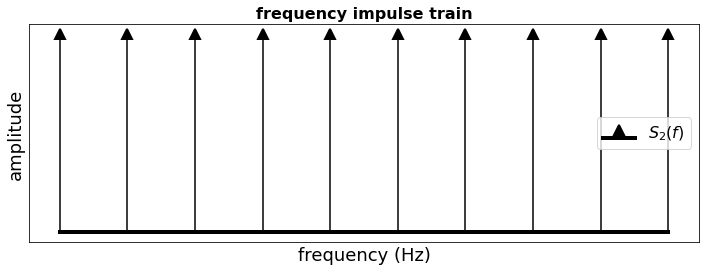

In [8]:
%matplotlib inline
fig, (ax1) = plt.subplots(1, 1, figsize=(12, 4)) 
fig.subplots_adjust(hspace=.5)

ons  = 10
offs = 20

plt.rc('xtick', labelsize=18) 
plt.rc('ytick', labelsize=18)
(markers, stemlines, baseline)= ax1.stem(ns[ons:offs], y[ons:offs], linefmt='k', markerfmt='k^', label='$S_2(f)$')
ax1.set_ylabel('amplitude', fontsize=18)
ax1.set_xlabel('frequency (Hz)', fontsize=18)
plt.tick_params(axis='both', which='major', labelsize=18)
ax1.set_title('frequency impulse train', fontweight="bold", size=16)
plt.setp(markers, marker='^', markersize=10, markeredgecolor="k", markeredgewidth=2)
plt.setp(baseline, linestyle="-", color="k", linewidth=4)
ax1.legend()
ax1.set_xticks([])
ax1.set_yticks([])
ax1.grid()

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="imS2.png" width="900" height="380" alt="Tiny"></a>
    <strong>Figure 3. Distancia entre un impulso en frecuencia y otro: $\large f_s$.</strong>

> + Ese espectro que teníamos de la señal continua en el tiempo, lo vamos a convolucionar por el espectro de ese tren de impulsos en frecuencia que tiene espaciamiento igual a $\large f_s$.

### En resumen, sabemos tres conceptos... que:
> + Una señal continua se convierte en una señal discreta por medio de la multiplicación de un tren de impulsos.
> + El proceso de multiplicación en el tiempo, va a tener un efecto de convolución en el dominio de la frecuencia.
> + La transformada de Fourier del tren de impulsos de duración infinita en el dominio del tiempo, es también un tren de impulsos de duración infinita pero en el dominio de la frecuencia.

### ¿Qué ocurre cuando se convoluciona una señal en el tiempo con un impulso en el tiempo? ... Obtenemos la misma señal!
$$
\begin{align}
\large s(t)*\delta(t) & = \large s(t)
\end{align}
$$

> + En efecto, veamos su demostración que es sencilla... Usemos la transformada de Fourier:
$$
\begin{align}
\large\mathscr{F}\left\lbrace \large s(t)*\delta(t) \right\rbrace &= \large\mathscr{F}\left\lbrace \large s(t)\right\rbrace \cdot \large\mathscr{F}\left\lbrace \large \delta(t)\right\rbrace \\
&= \large S(f)\cdot 1\\
& = \large S(f)
\end{align}
$$
> + Ahora, usemos la transformada de Fourier inversa a ambos lados de la igualdad:
$$
\begin{align}
\large\mathscr{F^{-1}}\mathscr{F}\left\lbrace \large s(t)*\delta(t) \right\rbrace & = \large \mathscr{F^{-1}}\left\lbrace \large S(f) \right\rbrace
\end{align}
$$
> + Por lo tanto, nos queda que:
$$
\begin{align}
\large s(t)*\delta(t) & = \large s(t) 
\end{align}
$$
> + Que era lo que queríamos demostrar!

### ¿Qué ocurre cuando se convoluciona una señal en el tiempo con un impulso desplazado en ${t_0}$ en el tiempo?... Obtenemos la misma señal en el tiempo pero desplazada ${t_0}$ en la misma dirección!... 
$$
\begin{align}
\large s(t)*\delta(t-t_0) & = \large s(t-t_0) 
\end{align}
$$

### Esto también se puede aplicar en el dominio de la frecuencia:
$$
\begin{align}
\large S(f)*\delta(f-f_0) & = \large S(f-f_0) 
\end{align}
$$

> + Ahora, usando la propiedad de **linealidad**, si tenemos una suma de impulsos, puedo convolucionar mi señal con cada uno de los impulsos: con el impulso uno, luego el impulso dos, etc... y posteriormente, hacemos la suma del resultado de las convoluciones que hemos realizado con cada uno de los impulsos.
> + Por lo tanto, lo que vamos a obtener es que:

$$
\begin{align}
S(f)* {\text{tren de impulsos de duración infinita en el dominio de la frecuencia}} 
\end{align}
$$

> + Obtendremos **réplicas infinitas** del espectro original $S(f)$...!
> + Matemáticamente, si el tren de impulsos en frecuencia lo representamos como
$$
\begin{align}
{\text{tren de impulsos de duración infinita en el dominio de la frecuencia}} = \sum_{k=-\infty}^{\infty}\delta(f-kf_s)
\end{align}
$$
> + donde $fs$ que es el valor de espaciamiento entre un impulso y otro, en frecuencia, y $k$ es un entero, que nos indica los desplazamientos en frecuencia de esos impulsos.

> + Así, tendremos el impulso en el origen en k = 0, luego, lo desplazamos infinitas veces hacia la izquierda, luego hacia la derecha, múltiplos enteros de la frecuencia de muestreo.

> + Matemáticamente, al convolucionar el espectro $S(f)$ con el tren de impulsos de duración infinita en el dominio de la frecuencia, obtendremos el espectro $S(f)$ en el origen pero también, lo obtendremos desplazado $k$ veces (réplicas) con un espaciamiento igual a la frecuencia de muestreo.    

<!--- Inline HTML works too --->
<p style="text-align:center">
    <a title="sistema"><img src="espect_conv_imp_freq_2.png" width="900" height="380" alt="Tiny"></a>
    <strong>Figure 3. Distancia entre un impulso en frecuencia y otro: $\large f_s$.</strong>